## Project Analysis 

## 🎬 <b> Data Analysis Project: Content Platform Insights

ABOUT THE PROJECT 

The Home Loan Project focuses on conducting an in-depth Exploratory Data Analysis (EDA) on a dataset related to loan applications and approvals. The dataset is expected to contain detailed information on various applicant attributes such as income, employment type, marital status, credit history, loan amount, and loan status. The objective is to perform EDA on the home loan dataset to uncover meaningful insights, identify patterns and trends in lending behavior, and support data-driven decision-making in the financial sector.

## 🔍 1. Data Exploration

In [3]:
## Creating a data frame 
## importing all the important libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
## safty net 
import warnings
warnings.filterwarnings("ignore")

In [5]:
## Loading data
df = pd.read_csv("loan_sanction_test.csv")

In [6]:
## Showing of data for the understanding 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
##Dimension, datatype,shape, columns, information of the data frame 
df.shape

(367, 12)

In [8]:
df.columns 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## 🧹 2. Data Cleaning

In [10]:
## Understanding categorical columns 
for i in df.select_dtypes(include=["object"]):
    a = df[i].value_counts()
    print(f"{a}")
    print("*************"*20)

Loan_ID
LP001015    1
LP001022    1
LP001031    1
LP001035    1
LP001051    1
           ..
LP002971    1
LP002975    1
LP002980    1
LP002986    1
LP002989    1
Name: count, Length: 367, dtype: int64
********************************************************************************************************************************************************************************************************************************************************************
Gender
Male      286
Female     70
Name: count, dtype: int64
********************************************************************************************************************************************************************************************************************************************************************
Married
Yes    233
No     134
Name: count, dtype: int64
****************************************************************************************************************************************************************

In [11]:
## missing value treatment 
print("Missing value")
print()
print(df.isnull().sum())


Missing value

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [12]:
##perchantage of missing value 
print("Missing values in Perchantage")
print()
print(df.isnull().sum()/len(df)*100)

Missing values in Perchantage

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64


## Descriptive statistic 

In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


<Axes: >

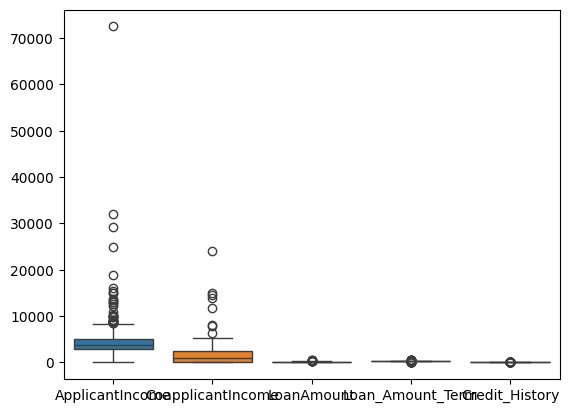

In [14]:
sns.boxplot(df)

In [15]:
## numerical columns 
num_col = df.select_dtypes(include = ["int64","float64"])
for i in num_col.columns:
    df[i] = df[i].fillna(df[i].median())

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [17]:
df[df["Gender"].isnull() == True ]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,LP001128,NaN,No,0,Graduate,No,3909,0,101.0,360.0,1.0,Urban
51,LP001287,NaN,Yes,3+,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
106,LP001563,NaN,No,0,Graduate,No,1596,1760,119.0,360.0,0.0,Urban
138,LP001769,NaN,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
209,LP002165,NaN,No,1,Not Graduate,No,2038,4027,100.0,360.0,1.0,Rural
231,LP002298,NaN,No,0,Graduate,Yes,2860,2988,138.0,360.0,1.0,Urban
245,LP002355,NaN,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban
279,LP002553,NaN,No,0,Graduate,No,29167,0,185.0,360.0,1.0,Semiurban
296,LP002614,NaN,No,0,Graduate,No,6478,0,108.0,360.0,1.0,Semiurban
303,LP002657,NaN,Yes,1,Not Graduate,Yes,570,2125,68.0,360.0,1.0,Rural


In [18]:
df["Gender"]=df["Gender"].fillna("NO Data")

In [19]:
df["Gender"].isnull().sum()

np.int64(0)

In [20]:
## numerical columns 
df["Gender"].fillna(df["Gender"].mode()[0],inplace =True)


In [21]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [22]:
## Adjusting the missing values in the object data type 
col = df.select_dtypes(include = ["object"])
for i in col.columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [23]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Handling Outliers 

In [24]:
# outliers handling by IQR Method 
for i in df.select_dtypes(include = ["int64","float64"]):
    q1 = df[i].quantile(0.25) ##finding first quartile 
    q3 = df[i].quantile(0.75) ##finding third quantile 
    iqr = q3-q1 ## finding iqr 
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr

    ## for every columns these calculations are different 
    print(f"column name: {i}")
    print(f"Q1:{q1}")
    print(f"Q2:{q3}")
    print(f"upper limit:{ul}")
    print(f"lower limit:{ll}")
    print("*******"*20)
    ## set values lower than lower limit -----> lower limit and upper limit than upper limit ----> upper limit 
    df[i] = np.where(df[i]>ul,ul,df[i])
    df[i] = np.where(df[i]<ll,ll,df[i])

column name: ApplicantIncome
Q1:2864.0
Q2:5060.0
upper limit:8354.0
lower limit:-430.0
********************************************************************************************************************************************
column name: CoapplicantIncome
Q1:0.0
Q2:2430.5
upper limit:6076.25
lower limit:-3645.75
********************************************************************************************************************************************
column name: LoanAmount
Q1:101.0
Q2:157.5
upper limit:242.25
lower limit:16.25
********************************************************************************************************************************************
column name: Loan_Amount_Term
Q1:360.0
Q2:360.0
upper limit:360.0
lower limit:360.0
********************************************************************************************************************************************
column name: Credit_History
Q1:1.0
Q2:1.0
upper limit:1.0
lower limit:1.0
***********************

<Axes: >

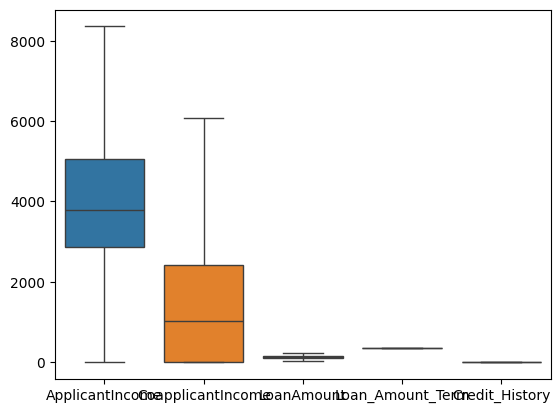

In [25]:
sns.boxplot(df)

In [26]:
## copying data 
cleaned_data = df.copy()

In [27]:
## saving data to Csv 
df.to_csv("clean_data.csv")

## 📈 4. Data Visualization
## 🧠 5. Content Analysis
## 🎞️ Part 1: Analytical Framework for Insight Extraction
Formulated a comprehensive set of analytical questions aimed at uncovering actionable insights from the dataset."
## ⏱️ Part 2: Bivariant Analysis 
Analyze variables trends with each other(e.g., How price effects the Demand ?).
## ⏱️ Part 3: Multivarient Analysis 
Performed a detailed examination of the interrelationships between all variables to identify potential correlations

##  Exploratory Data Analysis (EDA)
## ➤ Demographic Impact

Does gender influence the likelihood of getting a loan approved?

Does marital status impact the loan amount approved?

Does education level influence the applicant’s income?

Do self-employed applicants request higher loan amounts than salaried applicants?

## ➤ Financial Factors

Is there a relationship between applicant income and loan amount requested?

## ➤ Property and Location

Does property area type affect the loan amount approved?

Are urban applicants more likely to have a good credit history than rural applicants?

## ➤ Combined / Advanced Hypotheses

Do married applicants with dependents tend to request higher loan amounts compared to single applicants without dependents?

## Does gender influence the likelihood of getting a loan approved?

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


In [29]:
Gender = df["Gender"].value_counts()

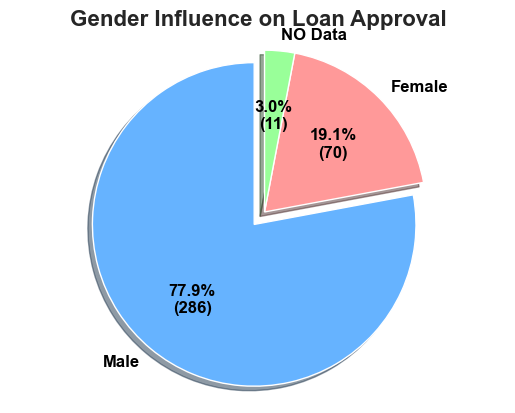

In [50]:
sizes = Gender.values
labels = Gender.index

# Make explode the same length as number of slices
explode = [0.1] + [0]*(len(sizes)-1)  # highlight first slice

colors = ["#66b3ff", "#ff9999", "#99ff99"][:len(sizes)]  # match number of slices

plt.pie(sizes,labels=labels,autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100.*sum(sizes)))})",startangle=90,colors=colors,explode=explode,shadow=True,
        textprops={'fontsize': 12, 'weight': 'bold', 'color': 'black'})

plt.axis('equal')
plt.title("Gender Influence on Loan Approval", fontsize=16, weight='bold')
plt.show()


## Does marital status impact the loan amount approved?

In [31]:
Marital_status = df["Married"].value_counts()
print(Marital_status)


Married
Yes    233
No     134
Name: count, dtype: int64


In [32]:
loan_amount = df["LoanAmount"].value_counts()
print(loan_amount)

LoanAmount
242.25    18
125.00    16
150.00    12
110.00    10
187.00     9
          ..
197.00     1
85.00      1
60.00      1
76.00      1
98.00      1
Name: count, Length: 130, dtype: int64


In [33]:
avg_loan = df.groupby("Married")["LoanAmount"].mean()
print(avg_loan)

Married
No     121.166045
Yes    138.164163
Name: LoanAmount, dtype: float64


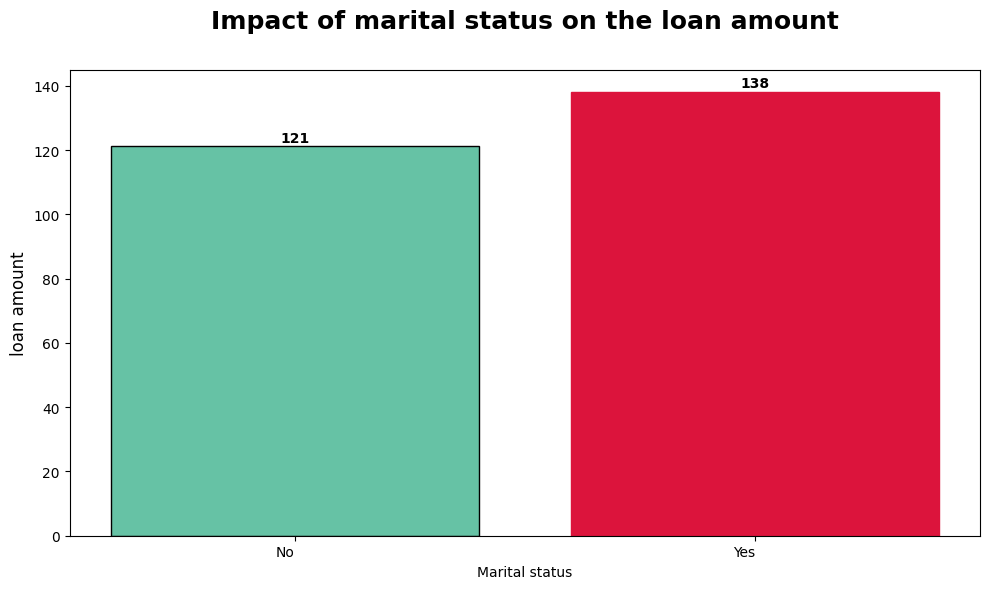

In [34]:
plt.figure(figsize=(10,6))
color = plt.cm.Set2(np.linspace(0,1,len(avg_loan)))
bars = plt.bar(x=avg_loan.index,height=avg_loan.values,color = color , edgecolor = 'black')

## title 
plt.title("Impact of marital status on the loan amount" , fontsize = 18, fontweight = 'bold', pad = 30 , loc = 'center')

## Labels 
plt.xlabel("Marital status" , fontsize = 10 , fontweight = 'medium')
plt.ylabel("loan amount" , fontsize = 12 , fontweight = 'medium')

##ticks and grids 
plt.xticks(ha= 'right',fontsize = 10 , fontweight = 'medium')
plt.yticks(fontsize = 10)

## values label on the top 
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, 
             f"{height:.0f}", ha="center", va="bottom", fontsize=10, fontweight="bold")
## highlight maximum bar 
max_idx = avg_loan.values.argmax()
bars[max_idx].set_color("crimson") 

plt.tight_layout()


plt.show()


## Does education level influence the applicant’s income?

In [35]:
influence = df.groupby("Education")["ApplicantIncome"].mean()
print(influence)

Education
Graduate        4455.346290
Not Graduate    3509.964286
Name: ApplicantIncome, dtype: float64


NameError: name 'y' is not defined

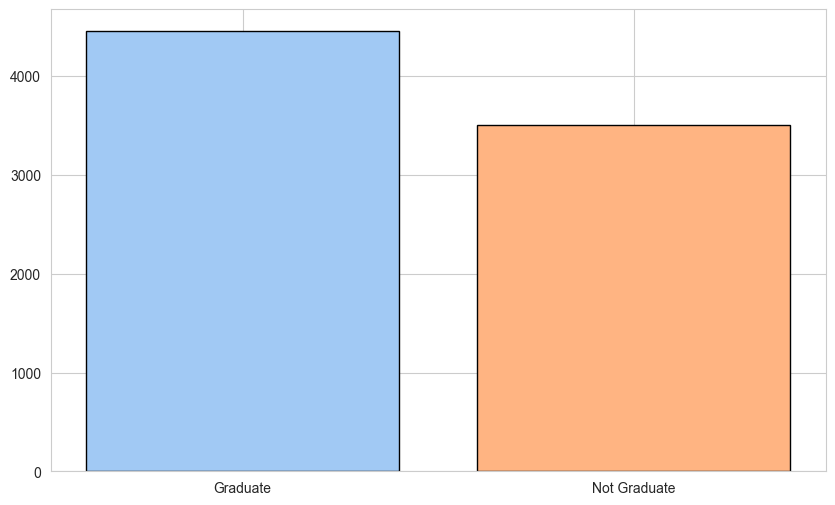

In [49]:
# Set figure size
plt.figure(figsize=(10,6))

# Create bar chart with color palette
bars = plt.bar(x = influence.index, height = influence.values, color=sns.color_palette("pastel"), edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02*max(y), f'{height:.1f}', 
             ha='center', va='bottom', fontsize=11, weight='bold')

# Add titles and labels
plt.title("Influence of Education on Income", fontsize=16, weight='bold')
plt.xlabel("Education Level", fontsize=12, weight='bold')
plt.ylabel("Income Influence", fontsize=12, weight='bold')

# Optional: rotate x-axis labels if long
plt.xticks(rotation=45)

# Optional: add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
df.head()

## Do self-employed applicants request higher loan amounts than salaried applicants?

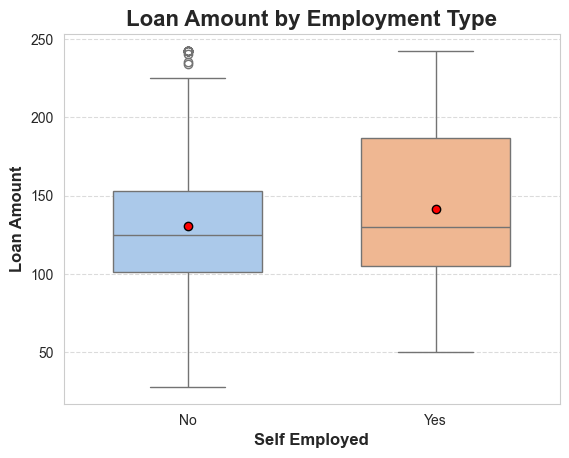

In [48]:
sns.boxplot( x='Self_Employed', y='LoanAmount', data=df, palette='pastel',width=0.6,showmeans=True,meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"} ) # mean style
# Titles and labels
plt.title("Loan Amount by Employment Type", fontsize=16, weight='bold')
plt.xlabel("Self Employed", fontsize=12, weight='bold')
plt.ylabel("Loan Amount", fontsize=12, weight='bold')

# Optional: grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Is there a relationship between applicant income and loan amount requested?

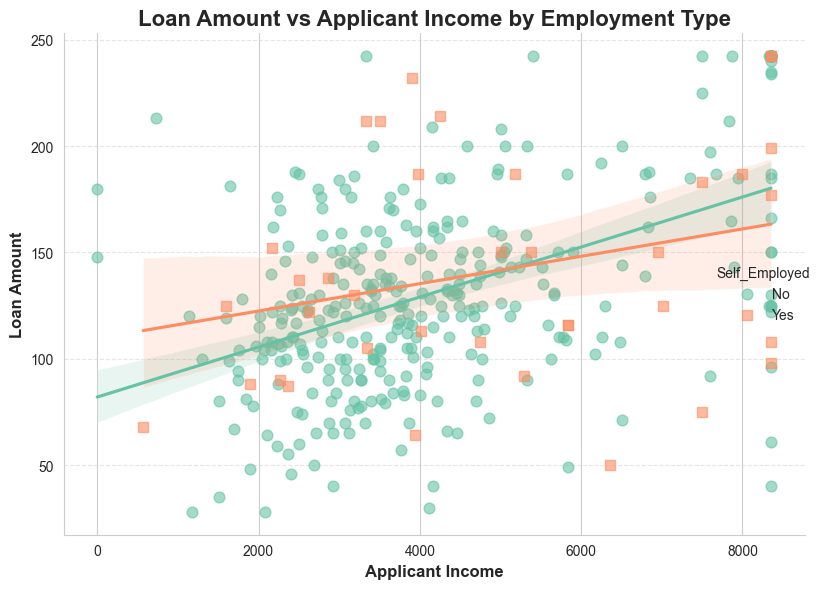

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Advanced scatter + regression with category coloring
sns.lmplot(
    data=df,x="ApplicantIncome", y="LoanAmount",hue="Self_Employed",markers=["o","s"],palette="Set2",height=6, aspect=1.2,scatter_kws={'alpha':0.6, 's':60},ci=95)

plt.title("Loan Amount vs Applicant Income by Employment Type", fontsize=16, weight='bold')
plt.xlabel("Applicant Income", fontsize=12, weight='bold')
plt.ylabel("Loan Amount", fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # horizontal grid
plt.tight_layout()
plt.show()

In [ ]:
df.head()

## Does property area type affect the loan amount approved?

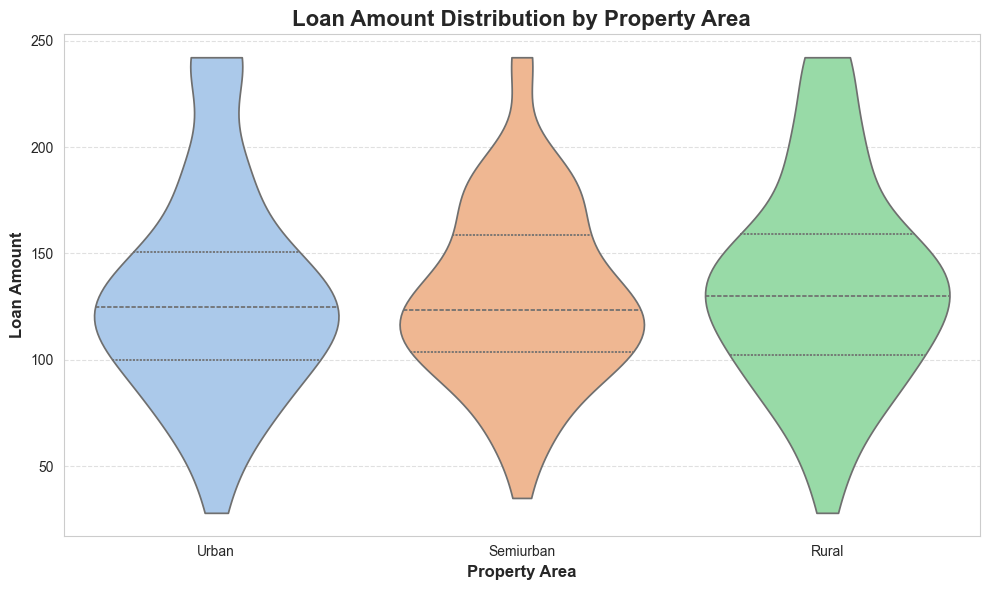

In [46]:
plt.figure(figsize=(10,6))

# Violin plot with enhancements
sns.violinplot(x='Property_Area',y='LoanAmount',data=df,palette='pastel',inner='quartile',scale='width',cut=0 )

# Titles and axis labels
plt.title("Loan Amount Distribution by Property Area", fontsize=16, weight='bold')
plt.xlabel("Property Area", fontsize=12, weight='bold')
plt.ylabel("Loan Amount", fontsize=12, weight='bold')

# Add horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
df.head()

## Are urban applicants more likely to have a good credit history than rural applicants?

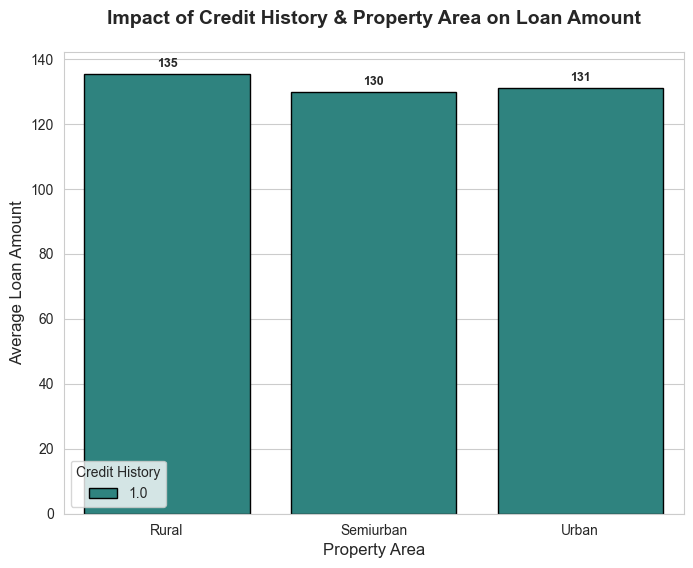

In [45]:
# Step 1: Group the dataset by both Credit_History and Property_Area
grouped_data = df.groupby(["Credit_History", "Property_Area"])["LoanAmount"].mean().reset_index()

# Step 2: Plot grouped bar chart
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")

sns.barplot(data=grouped_data,x="Property_Area",y="LoanAmount",hue="Credit_History",palette="viridis",edgecolor="black")

# Labels and title
plt.title("Impact of Credit History & Property Area on Loan Amount", fontsize=14, weight="bold", pad=20)
plt.xlabel("Property Area", fontsize=12)
plt.ylabel("Average Loan Amount", fontsize=12)

# Show values on top of bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.0f", fontsize=9, weight="bold", padding=3)

plt.legend(title="Credit History")
plt.show()

## Do married applicants with dependents tend to request higher loan amounts compared to single applicants without dependents?

In [43]:
married_dependence = df.groupby(["Married","Dependents"])["LoanAmount"].mean().reset_index()
print(married_dependence)

  Married Dependents  LoanAmount
0      No          0  122.329545
1      No          1  115.384615
2      No          2  133.166667
3      No         3+   96.200000
4     Yes          0  132.752500
5     Yes          1  132.727778
6     Yes          2  149.287736
7     Yes         3+  143.771429


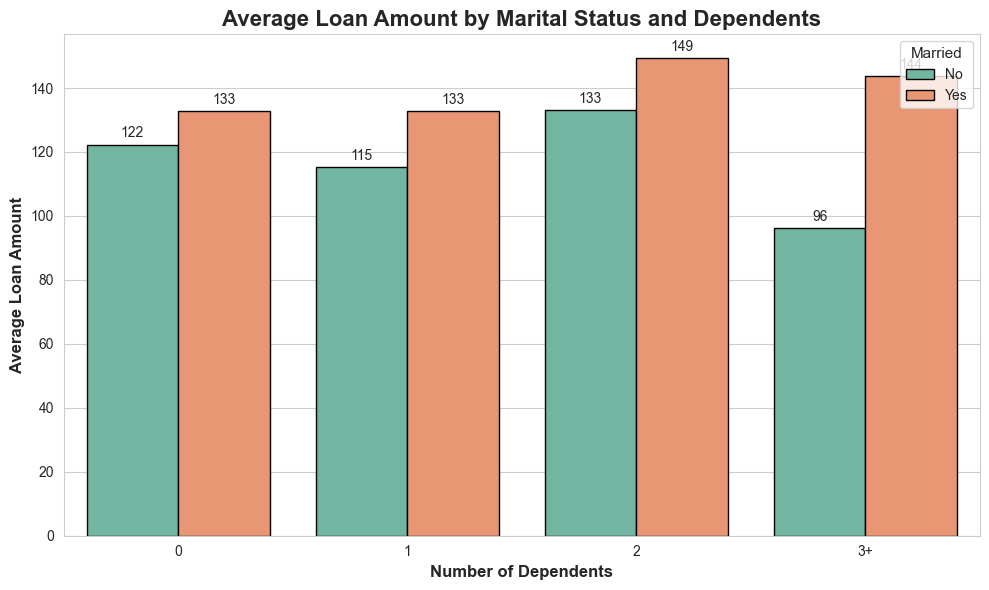

In [44]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Grouped barplot
bars = sns.barplot( data= married_dependence, x="Dependents", y="LoanAmount", hue="Married", palette="Set2",edgecolor="black")

# Add value labels
for container in bars.containers:
    bars.bar_label(container, fmt="%.0f", fontsize=10, padding=3)

# Titles and labels
plt.title("Average Loan Amount by Marital Status and Dependents", fontsize=16, weight='bold')
plt.xlabel("Number of Dependents", fontsize=12, weight='bold')
plt.ylabel("Average Loan Amount", fontsize=12, weight='bold')

# Legend formatting
plt.legend(title="Married", fontsize=10, title_fontsize=11, loc="upper right", frameon=True)

plt.tight_layout()
plt.show()

## Does property area influence the relationship between loan amount ?

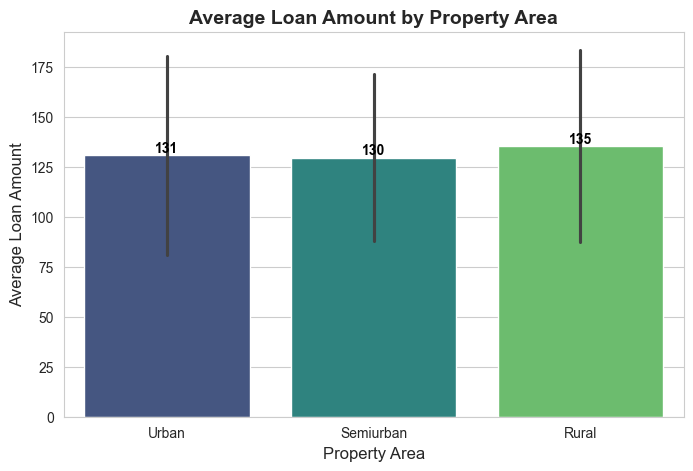

In [40]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

# Advanced barplot with error bars & palette
ax = sns.barplot(data=df, x="Property_Area", y="LoanAmount",estimator="mean",errorbar="sd",   palette="viridis")

# Add annotations on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom',
                fontsize=10, color='black', weight='bold')

# Titles and labels
plt.title("Average Loan Amount by Property Area", fontsize=14, weight='bold')
plt.xlabel("Property Area", fontsize=12)
plt.ylabel("Average Loan Amount", fontsize=12)

plt.show()

## Reccomandation and Conclusion 
Align loan offerings with the needs of the majority applicant groups.

Enhance approval rates by targeting suitable segments.

Improve customer satisfaction with tailored products

Strengthen the overall loan portfolio quality.
